In [1]:
import pandas as pd
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


def import_world_values_data():
    """
    Reads the world values data into data frames.

    Returns:
        values_train: world_values responses on the training set
        hdi_train: HDI (human development index) on the training set
        values_test: world_values responses on the testing set
    """
    values_train = pd.read_csv('world-values-train2.csv')
    values_train = values_train.drop(['Country'], axis=1)
    values_test = pd.read_csv('world-values-test.csv')
    values_test = values_test.drop(['Country'], axis=1)
    hdi_train = pd.read_csv('world-values-hdi-train2.csv')
    hdi_train = hdi_train.drop(['Country'], axis=1)
    return values_train, hdi_train, values_test


def plot_hdi_vs_feature(training_features, training_labels, feature, color, title):
    """
    Input:
    training_features: world_values responses on the training set
    training_labels: HDI (human development index) on the training set
    feature: name of one selected feature from training_features
    color: color to plot selected feature
    title: title of plot to display

    Output:
    Displays plot of HDI vs one selected feature.
    """
    plt.scatter(training_features[feature],
    training_labels['2015'],
    c=color)
    plt.title(title)
    plt.show()


def calculate_correlations(training_features,
                           training_labels):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set

    Output:
        Prints correlations between HDI and each feature, separately.
        Displays plot of HDI vs one selected feature.
    """
    # Calculate correlations between HDI and each feature
    correlations = []
    for column in training_features.columns:
        print(column, training_features[column].corr(training_labels['2015']))
        correlations.append(round(training_features[column].corr(training_labels['2015']), 4))
    print(correlations)
    print()

    # Identify three features
    feature_list = list(training_features.columns)
    feature_correlation = dict( zip(feature_list, correlations) )
    positive_correlation = max( feature_correlation, key=feature_correlation.get )
    negative_correlation = min( feature_correlation, key=feature_correlation.get )
    least_correlation = min( feature_correlation, key=lambda x: abs(feature_correlation.get(x)) )
    print("Most positively correlated:")
    print(positive_correlation + ": " + str(feature_correlation.get(positive_correlation)))
    plot_hdi_vs_feature(training_features, training_labels, positive_correlation,
                        'green', 'HDI versus ' + positive_correlation)
    print()
    print("Most negatively correlated:")
    print(negative_correlation + ": " + str(feature_correlation.get(negative_correlation)))
    plot_hdi_vs_feature(training_features, training_labels, negative_correlation,
                        'magenta', 'HDI versus ' + negative_correlation)
    print()
    print("Least correlated:")
    print(least_correlation + ": " + str(feature_correlation.get(least_correlation)))
    plot_hdi_vs_feature(training_features, training_labels, least_correlation,
                        'blue', 'HDI versus ' + least_correlation)
    print()
    print("Observation: For most positively correlated HDI-feature, the points spread in forward flash shape (/)\n" +
        "For most negatively correlated HDI-feature, the points spread in backward flash shape (/)\n" +
        "For least correlated HDI-feature, the points spread in C shape")
    print()


def plot_pca(training_features,
             training_labels,
             training_classes):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        training_classes: HDI class, determined by hdi_classification(), on the training set

    Output:
        Displays plot of first two PCA dimensions vs HDI
        Displays plot of first two PCA dimensions vs HDI, colored by class
    """
    # Run PCA on training_features
    pca = PCA()
    transformed_features = pca.fit_transform(training_features)

    # Plot countries by first two PCA dimensions
    plt.scatter(transformed_features[:, 0],     # Select first column
                transformed_features[:, 1],     # Select second column
                c=training_labels["2015"])
    plt.colorbar(label='Human Development Index')
    plt.title('Countries by World Values Responses after PCA')
    plt.show()

    # Plot countries by first two PCA dimensions, color by class
    # training_colors = training_classes.apply(lambda x: 'green' if x else 'red')
    # plt.scatter(transformed_features[:, 0],     # Select first column
    #             transformed_features[:, 1],     # Select second column
    #             c=training_colors)
    # plt.title('Countries by World Values Responses after PCA')
    # plt.show()


def plot_pca_2(training_features,
             training_labels,
             training_classes):
    # Run PCA on training_features
    pca = PCA()
    transformed_features = pca.fit_transform(training_features)
    
    # Plot countries by first two PCA dimensions, color by class
    training_colors = training_classes.apply(lambda x: 'green' if x else 'red')
    plt.scatter(transformed_features[:, 0],     # Select first column
                transformed_features[:, 1],     # Select second column
                c=training_colors)
    plt.title('Countries by World Values Responses after PCA (Low-High HDI)')
    plt.show()


def hdi_classification(hdi):
    """
    Input:
        hdi: HDI (human development index) value

    Output:
        high HDI vs low HDI class identification
    """
    if 1.0 > hdi >= 0.7:
        return 1.0
    elif 0.7 > hdi >= 0.30:
        return 0.0
    else:
        raise ValueError('Invalid HDI')


In [2]:
import numpy as np

regression_ridge_parameters = {
    'ridge__alpha': np.arange(0.001, 1.0, 0.001)
}

regression_lasso_parameters = {
    'lasso__alpha': np.arange(0.00001, 0.01, 0.00001)
}

regression_knn_parameters = {
    'knn__n_neighbors': np.arange(1, 50),

    # Apply uniform weighting vs k for k Nearest Neighbors Regression
    'knn__weights': ['uniform']

    # Apply distance weighting vs k for k Nearest Neighbors Regression
    # 'knn__weights': ['distance']
}

regression_knn_weighted_parameters = {
    'knn__n_neighbors': np.arange(1, 50),

    # Apply uniform weighting vs k for k Nearest Neighbors Regression
    # 'knn__weights': ['uniform']

    # Apply distance weighting vs k for k Nearest Neighbors Regression
    'knn__weights': ['distance']
}

classification_svm_parameters = {
    # Use linear kernel for SVM Classification
    'svm__kernel': ['linear'],

    # Use rbf kernel for SVM Classification
    # 'svm__kernel': ['rbf'],

    # Original hyperparameters
    'svm__C': np.arange(1.0, 100.0, 1.0),

    # Original hyperparameters scaled by 1/100
    # 'svm__C': np.arange(0.01, 1.0, 0.01),

    # Hyperparameter search over all possible dimensions for PCA reduction
    # 'pca__n_components': np.arange(1, 17),

    # 'svm__gamma': np.arange(0.001, 0.1, 0.001)
}

classification_svm_pca_scale_parameters = {
    # Use linear kernel for SVM Classification
    'svm__kernel': ['linear'],

    # Use rbf kernel for SVM Classification
    # 'svm__kernel': ['rbf'],

    # Original hyperparameters
    # 'svm__C': np.arange(1.0, 100.0, 1.0),

    # Original hyperparameters scaled by 1/100
    'svm__C': np.arange(0.01, 1.0, 0.01),

    # Hyperparameter search over all possible dimensions for PCA reduction
    'pca__n_components': np.arange(1, 17),

    # 'svm__gamma': np.arange(0.001, 0.1, 0.001)
}

classification_svm_rbf_parameters = {
    # Use linear kernel for SVM Classification
    # 'svm__kernel': ['linear'],

    # Use rbf kernel for SVM Classification
    'svm__kernel': ['rbf'],

    # Original hyperparameters
    'svm__C': np.arange(1.0, 100.0, 1.0),

    # Original hyperparameters scaled by 1/100
    # 'svm__C': np.arange(0.01, 1.0, 0.01),

    # Hyperparameter search over all possible dimensions for PCA reduction
    # 'pca__n_components': np.arange(1, 17),

    # 'svm__gamma': np.arange(0.001, 0.1, 0.001)
}

classification_knn_parameters = {
    'knn__n_neighbors': np.arange(1, 50),

    # Apply distance weighting vs k for k Nearest Neighbors Classification
    'knn__weights': ['distance']
}


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


ridge_regression_pipeline = Pipeline(
        [
            # Apply scaling to Ridge Regression
            # ('scale', StandardScaler()),

            ('ridge', Ridge())
        ]
    )

lasso_regression_pipeline = Pipeline(
        [
            # Apply scaling to Lasso Regression
            # ('scale', StandardScaler()),

            ('lasso', Lasso())
        ]
    )

k_nearest_neighbors_regression_pipeline = Pipeline(
        [
            # Apply scaling to k Nearest Neighbors Regression
            # ('scale', StandardScaler()),

            ('knn', KNeighborsRegressor())
        ]
    )

k_nearest_neighbors_regression_scaled_pipeline = Pipeline(
        [
            # Apply scaling to k Nearest Neighbors Regression
            ('scale', StandardScaler()),

            ('knn', KNeighborsRegressor())
        ]
    )


svm_classification_pipeline = Pipeline(
        [
            # Apply PCA to SVM Classification
            # ('pca', PCA()),

            # Apply scaling to SVM Classification
            # ('scale', StandardScaler()),

            ('svm', SVC())
        ]
    )


svm_classification_pca_scale_pipeline = Pipeline(
        [
            # Apply PCA to SVM Classification
            ('pca', PCA()),

            # Apply scaling to SVM Classification
            ('scale', StandardScaler()),

            ('svm', SVC())
        ]
    )


k_nearest_neighbors_classification_pipeline = Pipeline(
        [
            # Apply scaling to k Nearest Neighbors Classification
            # ('scale', StandardScaler()),

            ('knn', KNeighborsClassifier())
        ]
    )

k_nearest_neighbors_classification_scale_pipeline = Pipeline(
        [
            # Apply scaling to k Nearest Neighbors Classification
            ('scale', StandardScaler()),

            ('knn', KNeighborsClassifier())
        ]
    )


========== Question 3.(a) ==========
Done filling out the "Berkeley F2017 Values Survey"

Predicting HDI from World Values Survey

Importing Training and Testing Data
Training Data Count: 148
Test Data Count: 38

========== Question 3.(b)(c) ==========
Action taken on climate change 0.473312891543
Better transport and roads -0.439633638622
Support for people who can't work -0.336213236721
Access to clean water and sanitation -0.018169084456
Better healthcare -0.422012359959
A good education -0.303978889772
A responsive government we can trust 0.329445314984
Phone and internet access -0.351604712158
Reliable energy at home -0.285423563836
Affordable and nutritious food 0.195193300786
Protecting forests rivers and oceans 0.613458756271
Protection against crime and violence 0.14331869918
Political freedoms 0.238099006821
Freedom from discrimination and persecution 0.432932375445
Equality between men and women 0.276496043498
Better job opportunities -0.39734452674
[0.4733, -0.4395999999999

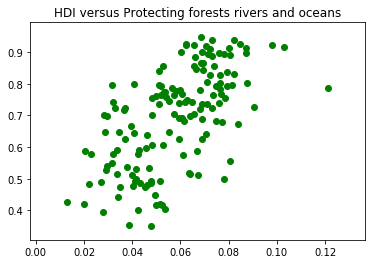


Most negatively correlated:
Better transport and roads: -0.4396


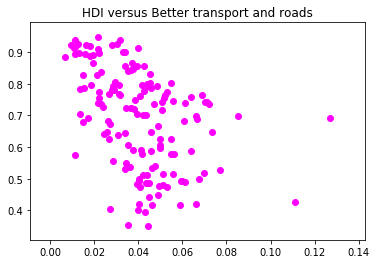


Least correlated:
Access to clean water and sanitation: -0.0182


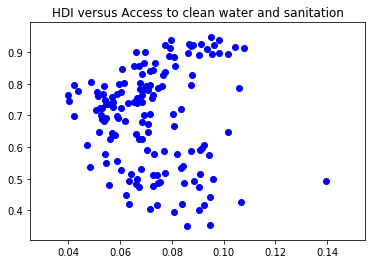


Observation: For most positively correlated HDI-feature, the points spread in forward flash shape (/)
For most negatively correlated HDI-feature, the points spread in backward flash shape (/)
For least correlated HDI-feature, the points spread in C shape

========== Question 3.(d) ==========


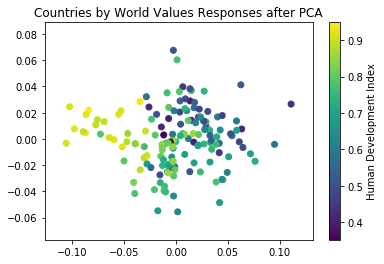


========== Question 3.(e) ==========
Ridge Regression
RMSE: 0.12288664701062982
Pipeline(memory=None,
     steps=[('ridge', Ridge(alpha=0.014999999999999999, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])
[[ 0.82512275 -0.73095272 -0.12512918 -1.43113028 -0.69165906 -0.88573308
   0.77408183 -0.99355445 -0.94180091  0.46182676  2.23534355 -0.15521277
   0.52742883  0.75955075  0.43529637 -0.06347831]]

I changed the range of hyper-parameter ridge__alpha to obtain the finer result. That is
ridge__alpha has np.arange(0.001, 1.0, 0.001) instead of np.arange(0.01, 1.0, 0.01) given
The best RMSE indicated above.

========== Question 3.(f) ==========
Lasso Regression
RMSE: 0.12598055237846487
Pipeline(memory=None,
     steps=[('lasso', Lasso(alpha=0.00018000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0

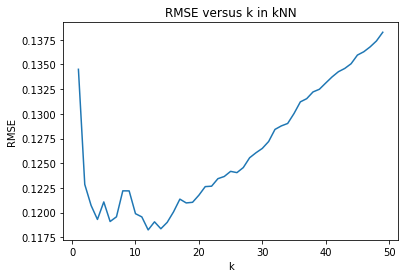


The best value of k is k = 12. The RMSE indicated above

========== Question 3.(k) ==========
When we increase k, the model goes from overfitting to fitting then underfitting. That is increasing k leads
to the increase of bias and decrease of variance because the model becomes less flexible to accommodate ambiguous
points. Since more points are taken into account when considering a test point, the model works more consistent
(with lower variance), but less accurate (with higher bias) if the nature of training data is the mingling of data points.

========== Question 3.(l) ==========
k Nearest Neighbors Regression with weighted neighbor distances
RMSE: 0.1171925270311745
Pipeline(memory=None,
     steps=[('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='distance'))])


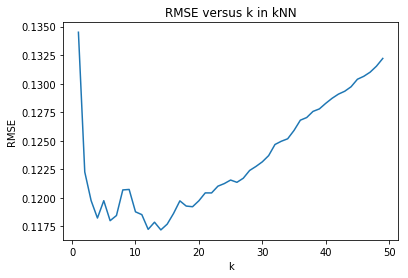


The best value of k is k = 14. The RMSE indicated above

========== Question 3.(m) ==========
Country indices: [90, 61, 108, 37, 69, 110, 132]
Countries: Ireland, United Kingdom, Finland, Belgium, Malta, France, Austria

Compared to (i), the neighbors just change order a little bit.

========== Question 3.(n) ==========
k Nearest Neighbors Regression with weighted neighbor distances and scaling the features
RMSE: 0.11488547357936414
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance'))])


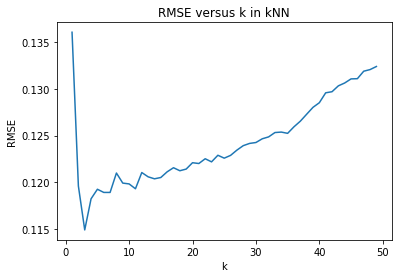


The best value of k is k = 3. The RMSE indicated above

========== Question 3.(o) ==========
We try not to scale each feature to have unit variance but having range [0, 1]That is, for each feature, we map value using function y = (x-a)/(b-a)where a is the min value of the feature and b is the max value of the feature
It does not helps much

========== Question 3.(p) ==========
The best model so far is kNN with k = 3, weighted neighbors and scaling
Done and submitted file submission.txt to gradescope.

========== Question 3.(q) ==========
The best naive classifier will assign all points to the most possible class.
The answer is 1/k.

========== Question 3.(s) ==========
The SVM may not work well, since a lot of points mingle with each other.
In other words, they are not linearly separate.

========== Question 3.(t) ==========
SVM Classification
Accuracy: 0.75
Pipeline(memory=None,
     steps=[('svm', SVC(C=48.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='o

In [6]:
"""
The world_values data set is available online at http://54.227.246.164/dataset/. In the data,
    residents of almost all countries were asked to rank their top 6 'priorities'. Specifically,
    they were asked "Which of these are most important for you and your family?"

This code and world-values.tex guides the student through the process of training several models
    to predict the HDI (Human Development Index) rating of a country from the responses of its
    citizens to the world values data. The new model they will try is k Nearest Neighbors (kNN).
    The students should also try to understand *why* the kNN works well.
"""

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca
from world_values_utils import plot_pca_2

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_scaled_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import svm_classification_pca_scale_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_scale_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import regression_knn_weighted_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_svm_pca_scale_parameters
from world_values_parameters import classification_svm_rbf_parameters
from world_values_parameters import classification_knn_parameters


def main():
    print("========== Question 3.(a) ==========")
    print('Done filling out the "Berkeley F2017 Values Survey"')
    print()

    print("Predicting HDI from World Values Survey")
    print()

    # Import Data #
    print("Importing Training and Testing Data")
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)

    # Data Information #
    print('Training Data Count:', values_train.shape[0])
    print('Test Data Count:', values_test.shape[0])
    print()

    # Calculate Correlations #
    print("========== Question 3.(b)(c) ==========")
    correlations = calculate_correlations(values_train, hdi_train)

    # PCA #
    print("========== Question 3.(d) ==========")
    plot_pca(values_train, hdi_train, hdi_class_train)
    print()

    # Regression Grid Searches #
    regression_grid_searches(training_features=values_train,
                             training_labels=hdi_shifted_train)

    print("========== Question 3.(o) ==========")
    print("We try not to scale each feature to have unit variance but having range [0, 1]" +
        "That is, for each feature, we map value using function y = (x-a)/(b-a)" +
        "where a is the min value of the feature and b is the max value of the feature")
    mapping = lambda x, a, b: (x-a)/(b-a)
#     mapped_values_train = scaler.fit_transform(values_train)
#     mapped_values_test = scaler.transform(values_test)
#     knn_map = KNeighborsRegressor(n_neighbors=3, weights="distance")
#     knn_map.fit(mapped_values_train, hdi_train["2015"])
#     knn.predict(scaled_values_test)
    print("It does not helps much")
    print()

    print("========== Question 3.(p) ==========")
    print("The best model so far is kNN with k = 3, weighted neighbors and scaling")
    scaler = StandardScaler()
    scaled_values_train = scaler.fit_transform(values_train)
    scaled_values_test = scaler.transform(values_test)
    knn = KNeighborsRegressor(n_neighbors=3, weights="distance")
    knn.fit(scaled_values_train, hdi_train["2015"])
    hdi_test = knn.predict(scaled_values_test)
    with open("submission.txt", "w") as f:
        for i in hdi_test:
            f.write(str(i)[:6] + "\n")
    print("Done and submitted file submission.txt to gradescope.")
    print()

    print("========== Question 3.(q) ==========")
    print("The best naive classifier will assign all points to the most possible class.\n" +
        "The answer is 1/k.")
    print()

    # PCA for Classification#
    # print("========== Question 3.(r) ==========")
    plot_pca_2(values_train, hdi_train, hdi_class_train)
    # print()

    print("========== Question 3.(s) ==========")
    print("The SVM may not work well, since a lot of points mingle with each other.\n" +
        "In other words, they are not linearly separate.")
    print()

    # Classification Grid Searches #
    classification_grid_searches(training_features=values_train,
                                 training_classes=hdi_class_train)

    print("========== Question 3.(x) ==========")
    print("At 110 responses, the feature numbers for Berkeley are: [33,30,15,57,51,95,44,55,36,57,22,54,31,47,36,52].")
    berkeley_110 = [33,30,15,57,51,95,44,55,36,57,22,54,31,47,36,52]
    berkeley_110 = [i / sum(berkeley_110) for i in berkeley_110]
    scaled_berkeley_110 = scaler.transform([berkeley_110])
    print("Predicted HDI: " + str(knn.predict(scaled_berkeley_110)[0]))
    print()
    print("At 162 responses, the feature numbers for Berkeley are: [49,37,19,79,71,139,60,83,55,84,31,83,38,73,41,72].")
    berkeley_162 = [49,37,19,79,71,139,60,83,55,84,31,83,38,73,41,72]
    berkeley_162 = [i / sum(berkeley_162) for i in berkeley_162]
    scaled_berkeley_162 = scaler.transform([berkeley_162])
    print("Predicted HDI: " + str(knn.predict(scaled_berkeley_162)[0]))
    print()
    print("At 229 responses, the feature numbers for Berkeley are: [68,46,26,116,98,198,83,115,78,118,39,116,58,99,64,89].")
    berkeley_229 = [68,46,26,116,98,198,83,115,78,118,39,116,58,99,64,89]
    berkeley_229 = [i / sum(berkeley_229) for i in berkeley_229]
    scaled_berkeley_229 = scaler.transform([berkeley_229])
    print("Predicted HDI: " + str(knn.predict(scaled_berkeley_229)[0]))
    print()

    print("========== Question 3.(y) ==========")
    print("Regarding the sensor location problem, we can use kNN in the same way:" +
        "Basically, we are given the distances from m sensors, we can treat them as a vector of features" +
        "For kNN, we don't learn the model but we learn the boundaries (generative model vs discrimimative model" +
        "that is, given a test point, we determined its 'distance' from k training points, then we infer its location" +
        "Implementation:" +
        "1. Create kNN model knn = KNeighborsRegressor()" +
        "2. Train model knn.fit(X, y)" +
        "3. Test model and caculate RMSE knn(X_test)" +
        "This is the basic model, we expect to tune parameter k, attempt scaling, attempt weighted neighbors, etc.")
    print()

    print("========== Question 3.(z) ==========")
    print("From this problems, I learned that data modelling is so painful and requires a lot of patience.\n" +
        "Basically, we have to try many model, and we have to search for wide ranges of different parameters" +
        "before come up with an acceptable model." +
        "For the nature of the problem, it looks like if our data spread out with low correlations coefficient,"+
        "the kNN method works better than ridge regression or lasso regression." +
        "Feedback for the problem author: The problem is very interesting and useful.")
    print()


def find_neighbors(training_features):
    distance_map = {}
    usa = np.array(training_features.iloc[45])
    for i in range(training_features.shape[0]):
        country = np.array(training_features.iloc[i])
        distance_map[i] = np.mean( (country - usa) ** 2 ) ** 0.5

    usa_neighbors = []
    for _ in range(8):
        index = min(distance_map, key=distance_map.get)
        distance_map.pop(index)
        usa_neighbors.append(index)
    print("Country indices: " + str(usa_neighbors[1:]))


def _rmse_grid_search(training_features, training_labels, pipeline, parameters, technique):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        pipeline: regression model specific pipeline
        parameters: regression model specific parameters
        technique: regression model's name

    Output:
        Prints best RMSE and best estimator
        Prints feature weights for Ridge and Lasso Regression
        Plots RMSE vs k for k Nearest Neighbors Regression
    """
    grid = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        scoring='neg_mean_squared_error')
    grid.fit(training_features,
             training_labels)
    print("RMSE:", sqrt(-grid.best_score_))
    print(grid.best_estimator_)

    # Check Ridge or Lasso Regression
    if hasattr(grid.best_estimator_.named_steps[technique], 'coef_'):
        print(grid.best_estimator_.named_steps[technique].coef_)
    else:
        # Plot RMSE vs k for k Nearest Neighbors Regression
        plt.plot(grid.cv_results_['param_knn__n_neighbors'],
                 (-grid.cv_results_['mean_test_score'])**0.5)
        plt.xlabel('k')
        plt.ylabel('RMSE')
        plt.title('RMSE versus k in kNN')
        plt.show()

    print()


def regression_grid_searches(training_features, training_labels):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set

    Output:
        Prints best RMSE, best estimator, feature weights for Ridge and Lasso Regression
        Prints best RMSE, best estimator, and plots RMSE vs k for k Nearest Neighbors Regression
    """

    print("========== Question 3.(e) ==========")
    print("Ridge Regression")
    _rmse_grid_search(training_features, training_labels,
                ridge_regression_pipeline, regression_ridge_parameters, 'ridge')
    print("I changed the range of hyper-parameter ridge__alpha to obtain the finer result. That is\n" +
        "ridge__alpha has np.arange(0.001, 1.0, 0.001) instead of np.arange(0.01, 1.0, 0.01) given\n" +
        "The best RMSE indicated above.")
    print()

    print("========== Question 3.(f) ==========")
    print("Lasso Regression")
    _rmse_grid_search(training_features, training_labels,
                lasso_regression_pipeline, regression_lasso_parameters, 'lasso')
    print("I changed the range of hyper-parameter lasso__alpha to obtain the finer result. That is\n" +
        "lasso__alpha has np.arange(0.00001, 0.01, 0.00001) instead of np.arange(0.0001, 0.01, 0.0001) given\n" +
        "The best RMSE indicated above.")
    print()

    print("========== Question 3.(g) ==========")
    print("The Lasso Regression does give more 0 weights.\n" +
        "That indicates some features do not really matter in this method.")
    print()

    print("========== Question 3.(h) ==========")
    print("To deal with continuous outputs, we can weight the neigbors instead of treating them uniformly.\n" +
        "Say, each neighbor is weighted by its inverse distance, and we use the average of k-neareast-neighbor\n" +
        "weights to predict the output.")
    print()

    print("========== Question 3.(i) ==========")
    print("The 7 nearest neighbors of the USA:")
    find_neighbors(training_features)
    print("Countries: Ireland, United Kingdom, Belgium, Finland, Malta, Austria, France")
    print()

    print("========== Question 3.(j) ==========")
    print("k Nearest Neighbors Regression")
    _rmse_grid_search(training_features, training_labels,
                k_nearest_neighbors_regression_pipeline,
                regression_knn_parameters, 'knn')
    print("The best value of k is k = 12. The RMSE indicated above")
    print()

    print("========== Question 3.(k) ==========")
    print("When we increase k, the model goes from overfitting to fitting then underfitting. That is increasing k leads\n" +
        "to the increase of bias and decrease of variance because the model becomes less flexible to accommodate ambiguous\n" +
        "points. Since more points are taken into account when considering a test point, the model works more consistent\n" +
        "(with lower variance), but less accurate (with higher bias) if the nature of training data is the mingling of data points.")
    print()

    print("========== Question 3.(l) ==========")
    print("k Nearest Neighbors Regression with weighted neighbor distances")
    _rmse_grid_search(training_features, training_labels,
                k_nearest_neighbors_regression_pipeline,
                regression_knn_weighted_parameters, 'knn')
    print("The best value of k is k = 14. The RMSE indicated above")
    print()

    print("========== Question 3.(m) ==========")
    scaler = StandardScaler()
    scaled_training_features = scaler.fit_transform(training_features)
    scaled_training_features = pd.DataFrame(scaled_training_features)
    find_neighbors(scaled_training_features)
    print("Countries: Ireland, United Kingdom, Finland, Belgium, Malta, France, Austria")
    print()
    print("Compared to (i), the neighbors just change order a little bit.")
    print()

    print("========== Question 3.(n) ==========")
    print("k Nearest Neighbors Regression with weighted neighbor distances and scaling the features")
    _rmse_grid_search(training_features, training_labels,
                k_nearest_neighbors_regression_scaled_pipeline,
                regression_knn_weighted_parameters, 'knn')
    print("The best value of k is k = 3. The RMSE indicated above")
    print()

#     print("========== Question 3.(o) ==========")
#     print("The best model so far is kNN with k = 3, weighted neighbors and scaling")
#     scaler = StandardScaler()
#     scaled_values_train = scaler.fit_transform(values_train)
#     scaled_values_test = scaler.transform(values_test)
#     knn = KNeighborsRegressor(n_neighbors=3, weights="distance")
#     knn.fit(scaled_values_train, hdi_train["2015"])
#     hdi_test = knn.predict(scaled_values_test)
#     with open("submission.txt", "w") as f:
#         for i in hdi_test:
#             f.write(str(i)[:6] + "\n")
#     print("Done and submitted file submission.txt to gradescope.")
#     print()


def _accuracy_grid_search(training_features, training_classes, pipeline, parameters):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        pipeline: classification model specific pipeline
        parameters: classification model specific parameters

    Output:
        Prints best accuracy and best estimator of classification model
    """
    grid = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        scoring='accuracy')
    grid.fit(training_features, training_classes)
    print("Accuracy:", grid.best_score_)
    print(grid.best_estimator_)
    print()


def classification_grid_searches(training_features, training_classes):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set

    Output:
        Prints best accuracy and best estimator for SVM and k Nearest Neighbors Classification
    """
    print("========== Question 3.(t) ==========")
    print("SVM Classification")
    _accuracy_grid_search(training_features, training_classes,
                        svm_classification_pipeline,
                        classification_svm_parameters)
    print("The accuracy indicated above.")
    print()

    print("========== Question 3.(u) ==========")
    print("SVM Classification modified by adding PCA step and Scaling step")
    _accuracy_grid_search(training_features, training_classes,
                        svm_classification_pca_scale_pipeline,
                        classification_svm_pca_scale_parameters)
    print("The accuracy indicated above. It does improve.")
    print()

    print("========== Question 3.(v) ==========")
    print("SVM Classification with kernel of radial basis function")
    _accuracy_grid_search(training_features, training_classes,
                        svm_classification_pipeline,
                        classification_svm_rbf_parameters)
    print("The accuracy indicated above.")
    print()

    print("========== Question 3.(w) ==========")
    print("k Nearest Neighbors Classification")
    _accuracy_grid_search(training_features, training_classes,
                        k_nearest_neighbors_classification_pipeline,
                        classification_knn_parameters)
    print("The accuracy indicated above.")
    print()

    print("k Nearest Neighbors Classification with Scaling")
    _accuracy_grid_search(training_features, training_classes,
                        k_nearest_neighbors_classification_scale_pipeline,
                        classification_knn_parameters)
    print("The accuracy indicated above.")
    print("Scling helps a little bit, increasing the accuracy from 0.7635 to 0.7703.")
    print()


if __name__ == '__main__':
    main()
